In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ast
import math
from advisor_client.client import *
client = AdvisorClient()

In [2]:
# get study
study_name = "optimal_jump6"
study = client.get_study_by_name(study_name)
print(study)

Id: 5, name: optimal_jump6, study_configuration: {"randomInitTrials": 10, "params": [{"parameterName": "jump_a", "type": "DOUBLE", "maxValue": 5.0, "minValue": -5.0}, {"parameterName": "jump_b", "type": "DOUBLE", "maxValue": 5.0, "minValue": -5.0}, {"parameterName": "jump_c", "type": "DOUBLE", "maxValue": 5.0, "minValue": -5.0}, {"parameterName": "jump_d", "type": "DOUBLE", "maxValue": 5.0, "minValue": 0}, {"parameterName": "opt_vel", "type": "DOUBLE", "maxValue": 6.0, "minValue": 3.0}], "goal": "MINIMIZE"}, algorithm: BayesianOptimization


('Is study done:', True)
best trial: Id: 287, study_name: optimal_jump6, name: BayesianOptimizationTrial, parameter_values: {"opt_vel": 4.18658755628751, "jump_d": 3.506245685045325, "jump_c": 2.947809910648722, "jump_b": 3.9995149958219507, "jump_a": -4.343276028196954}, objective_value: 0.777739302522


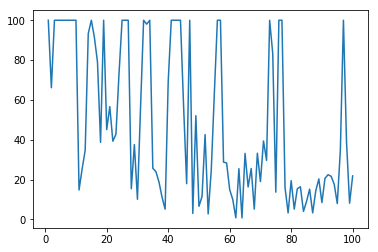

In [3]:
# plot training curve
train_curve = []
scale = 100
print("Is study done:",client.is_study_done(study_name))
trials = client.list_trials(study_name)
for trial in trials:
    trial_metrics = client.list_trial_metrics(study_name,trial.id)
    for metrics in trial_metrics:
        train_curve.append(metrics.objective_value)
train_curve = np.clip(np.array(train_curve),0,scale)
best_trial = client.get_best_trial(study_name)
best_objval = round(best_trial.objective_value,3)
print("best trial: {}".format(best_trial))

plt.plot(range(1,len(train_curve)+1),train_curve)
plt.savefig("./records/loss_"+str(best_objval)+"_"+str(scale)+".png")
plt.show()

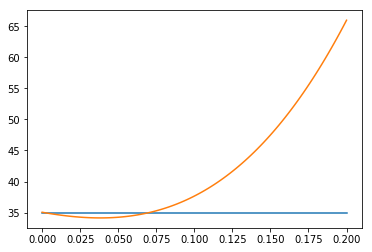

{'opt_vel': 4.18658755628751, 'jump_d': 3.506245685045325, 'jump_c': 2.947809910648722, 'jump_b': 3.9995149958219507, 'jump_a': -4.343276028196954}


In [4]:
param_dic = ast.literal_eval(best_trial.parameter_values)
a = param_dic["jump_a"]
b = param_dic["jump_b"]
c = param_dic["jump_c"]
d = param_dic["jump_d"]
t = np.linspace(0,0.2,100)
y_constant = 35*np.ones_like(t)
y_poly = (10*a * t + 100*b * t ** 2 + 1000*c * t ** 3 + 10*d)

plt.plot(t,y_constant)
plt.plot(t,y_poly)
plt.savefig("./records/torque_"+str(best_objval)+".png")
plt.show()
print(param_dic)

In [5]:
with open("./controllers/my_controller_python/args.txt",'w') as f1:
    f1.write(str(param_dic))
with open("./records/args_"+str(best_objval)+".txt",'w') as f1:
    f1.write(str(param_dic))

os.system('webots --mode=pause')
with open("./controllers/my_controller_python/metrics.txt",'r') as f2:
    metrics_dic = eval(f2.read())
    y = metrics_dic["jump_metrics"]
print("objective_value:",y)

('objective_value:', 78.1507051803928)
